1. Using the dataset `digits.csv` ty to find an `im` that when plotted is a `3`

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Assign filename to variable: file
file = '../data/13. Importando datos en Python/digits.csv'

# Load file as array: digits
digits = np.loadtxt(file, delimiter=',')

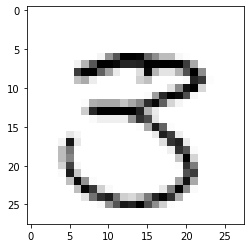

In [16]:
### Select and reshape a row
im = digits[7, 1:]
im_sq = np.reshape(im, (28, 28))

# Plot reshaped data (matplotlib.pyplot already loaded as plt)
plt.imshow(im_sq, cmap='Greys', interpolation='nearest')
plt.show()

2. Load the dataset `baby.csv` using pandas.

In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('../data/13. Importando datos en Python/baby.csv')
df.head()

,BRITH_YEAR,GENDER,ETHNICTY,NAME,COUNT,RANK
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


3. List all sheets from the file `medals_opened.xlsx` and save the sheet `Gold` to `gold` and show the first 10 rows using `.head()`. Also, make sure to change the names of the columns to `Country` and `Total Gold Medals`.

In [5]:
# Assign spreadsheet filename: file
file = '../data/23. Manipulando dataframes/medals_opened.xlsx'

# Load spreadsheet: xl
xl = pd.ExcelFile(file)

# Print sheet names
print(xl.sheet_names)

['Total', 'Gold', 'Silver', 'Bronze']


In [12]:
# Load a sheet into a DataFrame by name: gold
gold = xl.parse('Gold',names=(['Country','Total Gold Medals']))
gold.head(10)

,Country,Total Gold Medals
0,USA,930
1,NaN,395
2,GER,247
3,GBR,207
4,FRA,192
5,ITA,190
6,SWE,142
7,HUN,159
8,AUS,131
9,NaN,153


4. Convert the `fifa` list to a numpy array `np_fifa`. Then create a numpy array called `np_weights` using the `np_fifa` array (remember to cast them to `float`). Then, check if the weights of the right GK is different from left GK (at least on their medians). Why would we use median instead of mean?

In [13]:
fifa = [[69, 'GK', 191, ' Right'],[64, 'GK', 193, ' Right'],[65, 'GK', 190, ' Right'],[67, 'D', 178, ' Right'],
        [61, 'GK', 185, ' Right'],[62, 'D', 185, ' Right'],[76, 'D', 193, ' Right'],[63, 'M', 183, ' Left'],
        [72, 'A', 184, ' Left'],[72, 'M', 178, ' Left'],[63, 'D', 180, ' Right'],[73, 'M', 177, ' Right'],
        [70, 'GK', 188, ' Right'],[64, 'M', 177, ' Left'],[65, 'GK', 187, ' Left'],[75, 'A', 186, ' Left'],
        [74, 'D', 183, ' Right'],[70, 'GK', 189, ' Right'],[78, 'A', 179, ' Left'],[66, 'GK', 196, ' Right'],
        [75, 'GK', 190, ' Left'],[67, 'GK', 189, ' Left'],[71, 'GK', 188, ' Left'],[70, 'A', 188, ' Left']]

In [21]:
import numpy as np
np_fifa = np.array(fifa)
np_weights = np_fifa[:,0].astype(float)
np_positions = np_fifa[:,1]
np_side = np_fifa[:,3]
print(np_side)

[' Right' ' Right' ' Right' ' Right' ' Right' ' Right' ' Right' ' Left'
 ' Left' ' Left' ' Right' ' Right' ' Right' ' Left' ' Left' ' Left'
 ' Right' ' Right' ' Left' ' Right' ' Left' ' Left' ' Left' ' Left']


In [27]:
# Weights of the goalkeepers: gk_heights
gk_r_weights = np_weights[(np_side == ' Right') & (np_positions == 'GK')]

# Weights of the other players: other_heights
gk_l_weights = np_weights[(np_side==' Left') & (np_positions =='GK')]

# Print out the median height of goalkeepers. Replace 'None'
print("Median weight of right goalkeepers: " + str(np.median(gk_r_weights)))
print("Median weight of left goalkeepers: " + str(np.median(gk_l_weights)))

Median weight of right goalkeepers: 66.0
Median weight of left goalkeepers: 69.0


5. Using the matrix `M1` create `M3` by transpose `M1` and multiplying it by itself. Sum `M3` & `M2`.

In [29]:
M1 = [[8], 
      [12], 
      [-11]]

M2 = [[3, 16, -6],
      [9, 7, -4], 
      [-1, 3, 13]]

In [31]:
M1 = np.array(M1)
M2 = np.array(M2)
M3 = M1 * M1.T
print(M3 + M2)

[[  67  112  -94]
 [ 105  151 -136]
 [ -89 -129  134]]


**expected output:**

`array([[  67,  112,  -94],
       [ 105,  151, -136],
       [ -89, -129,  134]])`

6. Create a function `text_analyzer` that takes as parameter a `path` and returns the most frequent word and the statistics of the frequencies on the document. `text_analyzer` uses other functions to get its final output. Go function by function below and complete them so that you get the correct output on `create_word_dic`, `most_frequent_word`, `np_word_statistics`.

In [32]:
def create_word_dic(words):
    '''
    Creates a dictionary with words as keys and frequency of that word on text as values.
    '''
    dic = {}
    for w in words:
        if w in dic.keys():
            dic[w] += 1
        else:
            dic[w] = 1
    return dic

In [33]:
def most_frequent_word(dic):
    '''
    Finds the most frequent word from a dic of {words: count}.
    '''
    acc = 0
    for k, w in dic.items():
        if w > acc:
            acc = w
            most_frequent_word = k
    return most_frequent_word

In [34]:
def np_word_statistic(dic):
    '''
    Uses numpy to effitiently compute statistics from a dic of {word: count}.
    '''
    np_dic = np.array([*dic.items()])
    np_dic_values = np_dic[:,1].astype(float)
    np_dic_mean = np_dic_values.mean()
    np_dic_std = np_dic_values.std()
    return np_dic_mean, np_dic_std

In [37]:
def text_analyzer(path):
    with open(path) as file:
        words = file.read().lower().split()
        dic = create_word_dic(words)
        mfw = most_frequent_word(dic)
        meanz, stdz = np_word_statistic(dic)
        print(f'Most frequent word is "{mfw}"')
        print(f'Mean word frequency on text: {round(meanz, 2)} with a standard deviation of {round(stdz, 2)}')

In [36]:
path = '../data/13. Importando datos en Python/moby_dick.txt'
text_analyzer(path)

Most frequent word is "the"
Mean word frequency on text: 1.45 with a standard deviation of 1.35


**expected output:** 

Most frequent word is "the"

Mean word frequency on text: 1.45 with a standard deviation of 1.35